# Mid Bootcamp Project

## Set up

In [276]:
# importing the necesary packages
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [277]:
# opening the file
df = pd.read_excel('/Users/AFROARC/Documents/GitHub/mid_bootcamp_project/datasets/regression_data.xls')

In [278]:
# getting information from the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [279]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [280]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


## EDA

### A quick data check & cleanup

First we will look at all out data in graphs, to get an overall idea

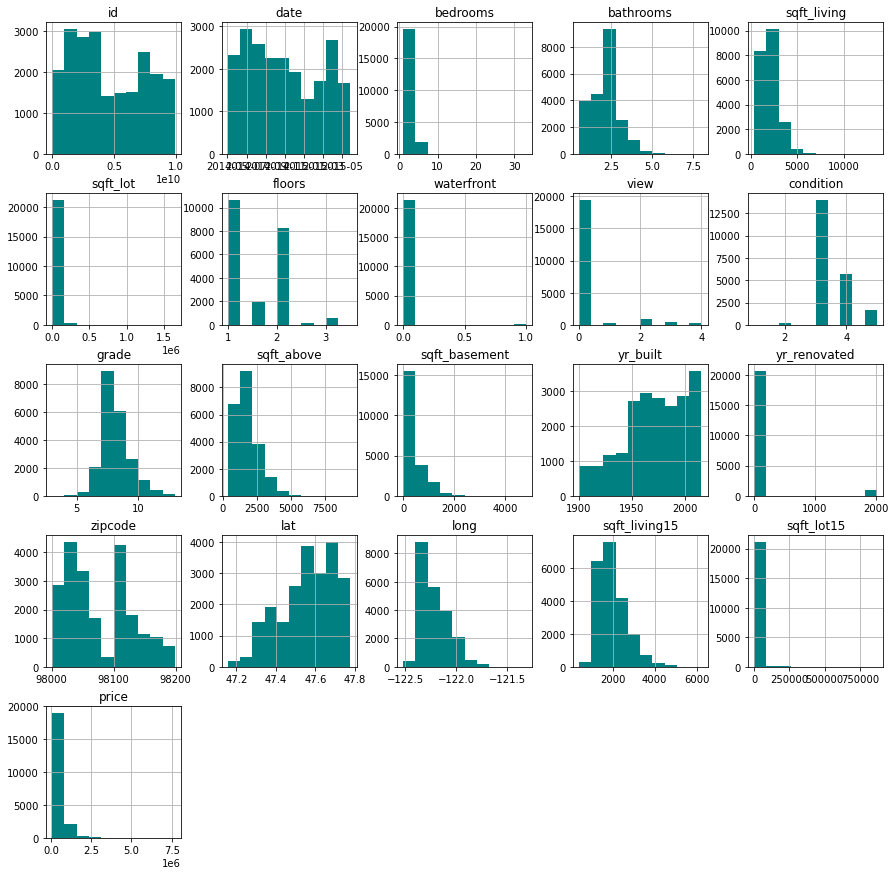

In [281]:
df.hist(layout= (5,5), figsize = (15,15), color = 'teal')
plt.show()

#### ID

We saw on a first check that we have no nulls, so we will run a quick value check to see if there's any 'weird' numbers

In [282]:
# checking id
df.id.value_counts()

795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: id, Length: 21420, dtype: int64

In [283]:
# we have some duplicated ID's, checking one for reference
df.loc[df['id'] == 795000620]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
17588,795000620,2014-09-24,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,115000
17589,795000620,2014-12-15,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,124000
17590,795000620,2015-03-11,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,157000


 Apparently in the duplicated ID's the price changes with the date so we are keeping it for better accuracy of the model but we are dropping the column anyway

In [284]:
df.drop(['id'], axis = 1, inplace = True) 

#### Bedrooms

In [285]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [286]:
# 33 bedrooms? might be an error
# check the row
df.loc[df['bedrooms'] == 33]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,2014-06-25,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000


Since we are not sure if it's a typo and leaving it will make a big difference on our data we decided to drop it

In [287]:
df.drop(df.index[15856])

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


#### Bathrooms

In [288]:
df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

#### Floors

In [289]:
df.floors.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

#### SQFT Living & SQFT Living 15

In [290]:
df.sqft_living.value_counts()

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
2507      1
9890      1
5584      1
1961      1
1425      1
Name: sqft_living, Length: 1034, dtype: int64

In [291]:
df.sqft_living15.value_counts()

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
3736      1
4950      1
2728      1
4740      1
2927      1
Name: sqft_living15, Length: 777, dtype: int64

For better accuracy and less data we decided to drop sqft_living & sqft_lot, giving that we have updated sizes on another column (sqft_living15 & sqft_lot15)

In [292]:
df.drop(['sqft_living', 'sqft_lot'], axis = 1, inplace = True) 

In [293]:
# reindexing
df.reset_index(drop=True, inplace=True)

In [294]:
df.head()

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


#### Years Built & Renovated

In [295]:
df.yr_renovated.value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

We won't be able to work with the zeroes in the yr_renovated and they are a majority so we decided to drop it

In [296]:
df.drop(['yr_renovated'], axis = 1, inplace = True)

The year built is actually a date, we decided to turn it into a regular number by obtaining the age of the house (based on 2015 as end date)

In [297]:
# creating new age column
dfnew = pd.DataFrame(2015 - df["yr_built"])
dfnew

,yr_built
0,60
1,64
2,82
3,50
4,28
...,...
21592,6
21593,1
21594,6
21595,11


In [298]:
# renaming column in new dataframe
dfnew.rename(columns={'yr_built': 'house_age'}, inplace=True) 
# joining dataframes
df = pd.concat([df, dfnew], axis=1)
df.head()

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_age
0,2014-10-13,3,1.00,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,221900,60
1,2014-12-09,3,2.25,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,538000,64
2,2015-02-25,2,1.00,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,180000,82
3,2014-12-09,4,3.00,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,604000,50
4,2015-02-18,3,2.00,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,510000,28


In [299]:
# droping the column
df.drop(['yr_built'], axis = 1, inplace = True) 

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  float64       
 3   floors         21597 non-null  float64       
 4   waterfront     21597 non-null  int64         
 5   view           21597 non-null  int64         
 6   condition      21597 non-null  int64         
 7   grade          21597 non-null  int64         
 8   sqft_above     21597 non-null  int64         
 9   sqft_basement  21597 non-null  int64         
 10  zipcode        21597 non-null  int64         
 11  lat            21597 non-null  float64       
 12  long           21597 non-null  float64       
 13  sqft_living15  21597 non-null  int64         
 14  sqft_lot15     21597 non-null  int64         
 15  price          2159

#### LAT, LONG, ZIPCODE

Too many columns for the same information, since lat and long should be together we decided to only keep zipcode for now, keeping in mind that we might bring them back for another purposes

In [301]:
#df.drop(['lat', 'long'], axis = 1, inplace = True) 

In [302]:
df.head()

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_age
0,2014-10-13,3,1.00,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,221900,60
1,2014-12-09,3,2.25,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,538000,64
2,2015-02-25,2,1.00,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,180000,82
3,2014-12-09,4,3.00,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,604000,50
4,2015-02-18,3,2.00,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,510000,28


#### DATE

We don't consider it really necessary for our predictions and turning it into numbers doesn't seem really useful, so we are dropping the column

In [303]:
df.drop(['date'], axis = 1, inplace = True) 

In [304]:
# reindexing
df.reset_index(drop=True, inplace=True)

#### Grade

In [305]:
df.grade.value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

According to google, the grade 1-3:  'Falls short of minimum building standards. Normally cabin or inferior structure.'


In [306]:
# checking and removing the grade
df.loc[df['grade'] == 3]

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_age
3220,1,0.75,1.0,0,0,5,3,520,0,98022,47.2082,-121.995,1340,12233,262000,95


In [307]:
df.drop(df.index[3220])

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_age
0,3,1.00,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,221900,60
1,3,2.25,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,538000,64
2,2,1.00,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,180000,82
3,4,3.00,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,604000,50
4,3,2.00,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,510000,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0,0,3,8,1530,0,98103,47.6993,-122.346,1530,1509,360000,6
21593,4,2.50,2.0,0,0,3,8,2310,0,98146,47.5107,-122.362,1830,7200,400000,1
21594,2,0.75,2.0,0,0,3,7,1020,0,98144,47.5944,-122.299,1020,2007,402101,6
21595,3,2.50,2.0,0,0,3,8,1600,0,98027,47.5345,-122.069,1410,1287,400000,11


In [308]:
# reindexing
df.reset_index(drop=True, inplace=True)

## Correlations

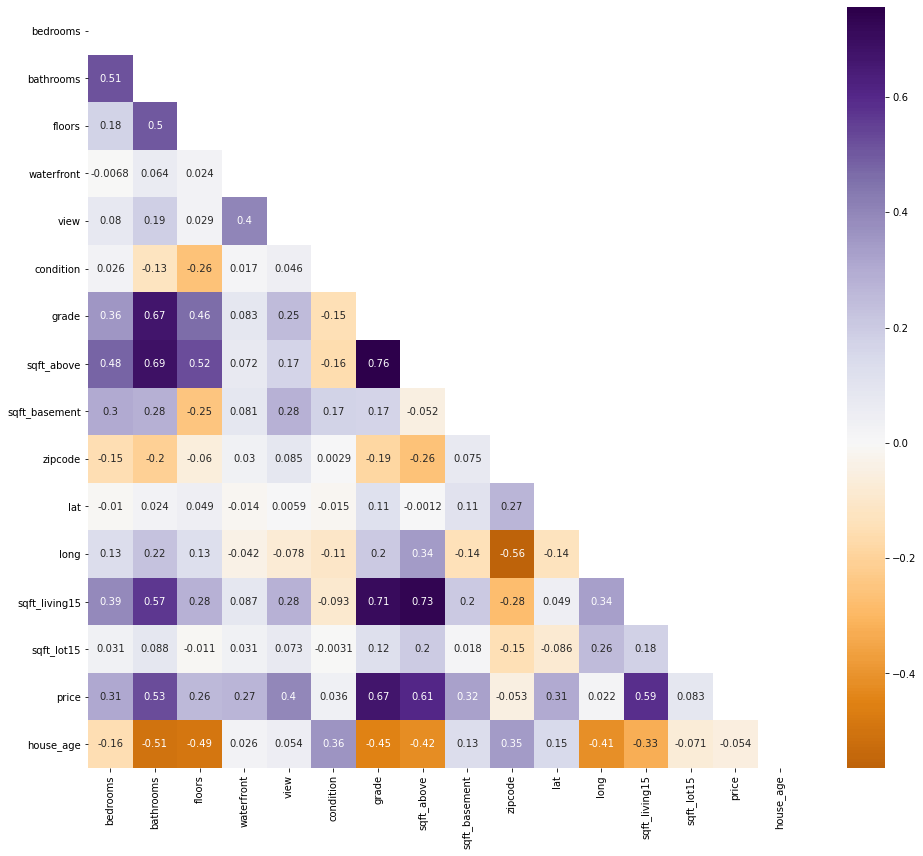

In [309]:
# checking correlations
corr_matrix = df.corr()
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(16,14))
sns.heatmap(df.corr(),
           annot = True,
           center = 0,
           mask = mask,
           cmap = 'PuOr')
plt.show();

High correlations between features: first model might not be as accurate, maybe drop some features in the next try but for now we will use them all

#### Quick scatter check of columns for future comparison

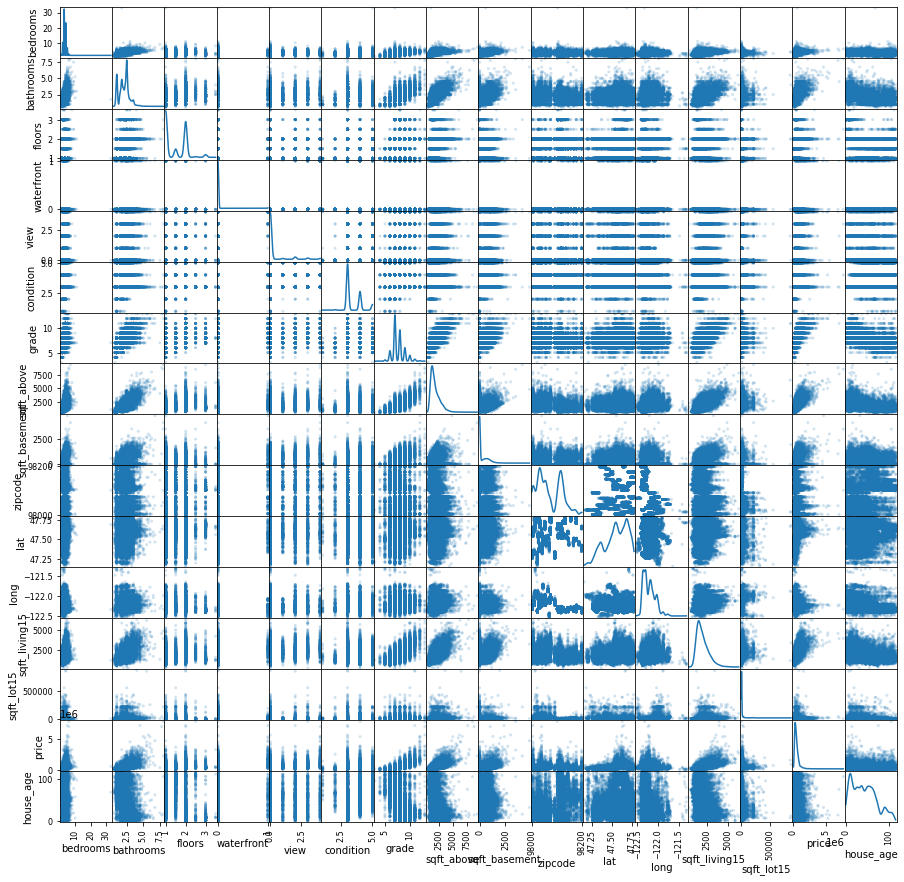

In [310]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(15,15), diagonal="kde");

## Modelling

In [311]:
# getting the packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import numpy as np

### First Linear Regression with StandardScaler

#### Standardizing

In [312]:
from sklearn.preprocessing import StandardScaler
dfstand = df.drop(columns=['price'])
transformer = StandardScaler().fit(dfstand)
standarddf = transformer.transform(dfstand)

In [313]:
standarddf

array([[-0.40290302, -1.45107268, -0.91555234, ..., -0.94367562,
        -0.26062671,  0.54467809],
       [-0.40290302,  0.17448579,  0.93743087, ..., -0.43288674,
        -0.18769961,  0.68085037],
       [-1.48249316, -1.45107268, -0.91555234, ...,  1.07029196,
        -0.17219022,  1.29362563],
       ...,
       [-1.48249316, -1.77618438,  0.93743087, ..., -1.41068259,
        -0.39419807, -1.29364769],
       [-0.40290302,  0.49959749,  0.93743087, ..., -0.84151784,
        -0.42059702, -1.12343234],
       [-1.48249316, -1.77618438,  0.93743087, ..., -1.41068259,
        -0.41803046, -1.25960462]])

In [314]:
dfstand = pd.DataFrame(standarddf)

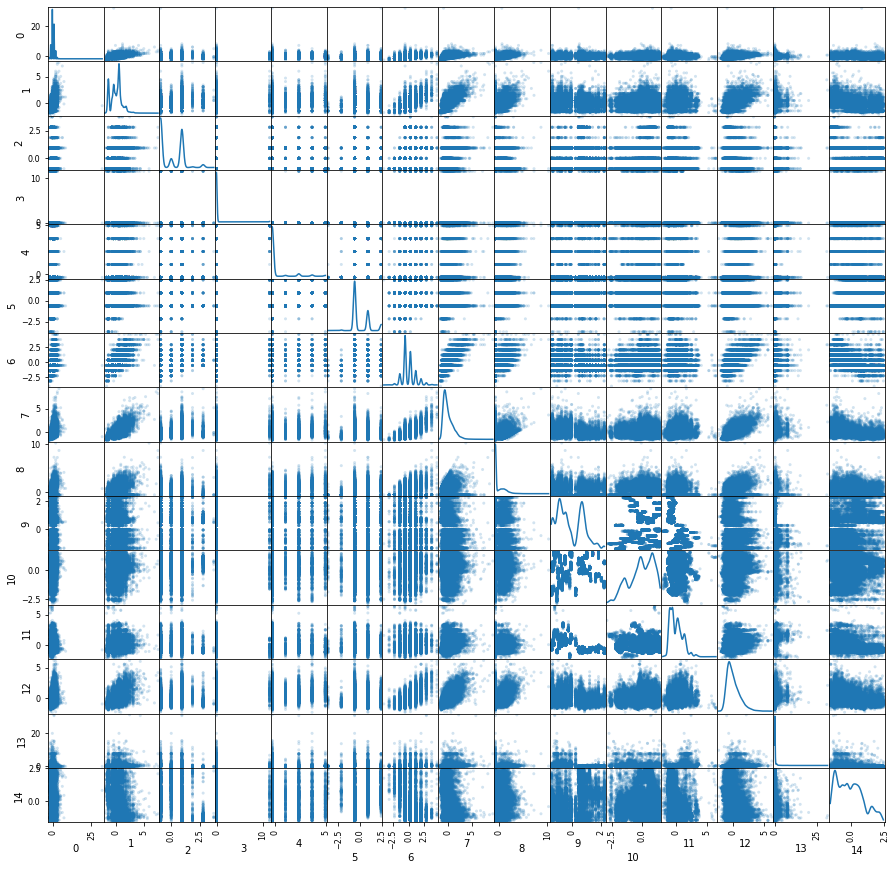

In [315]:
scatter_matrix(dfstand, alpha=0.2, figsize=(15,15), diagonal="kde");

#### Defining X & y

In [316]:
X = dfstand

In [317]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.402903,-1.451073,-0.915552,-0.087205,-0.305715,-0.629986,-0.560800,-0.735251,-0.659031,1.869645,-0.352894,-0.305695,-0.943676,-0.260627,0.544678
1,-0.402903,0.174486,0.937431,-0.087205,-0.305715,-0.629986,-0.560800,0.460776,0.244602,0.879210,1.161376,-0.746286,-0.432887,-0.187700,0.680850
2,-1.482493,-1.451073,-0.915552,-0.087205,-0.305715,-0.629986,-1.413190,-1.230575,-0.659031,-0.933473,1.283355,-0.135144,1.070292,-0.172190,1.293626
3,0.676687,1.149821,-0.915552,-0.087205,-0.305715,2.444427,-0.560800,-0.892305,1.396734,1.084772,-0.283604,-1.272151,-0.914488,-0.284459,0.204247
4,-0.402903,-0.150626,-0.915552,-0.087205,-0.305715,-0.629986,0.291589,-0.131197,-0.659031,-0.073850,0.409293,1.200840,-0.272353,-0.192686,-0.544700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-0.402903,0.499597,2.790414,-0.087205,-0.305715,-0.629986,0.291589,-0.312413,-0.659031,0.468086,1.004752,-0.938156,-0.666390,-0.412457,-1.293648
21593,0.676687,0.499597,0.937431,-0.087205,-0.305715,-0.629986,0.291589,0.629911,-0.659031,1.271647,-0.356503,-1.051856,-0.228571,-0.203796,-1.463863
21594,-1.482493,-1.776184,0.937431,-0.087205,-0.305715,-0.629986,-0.560800,-0.928548,-0.659031,1.234272,0.247617,-0.604160,-1.410683,-0.394198,-1.293648
21595,-0.402903,0.499597,0.937431,-0.087205,-0.305715,-0.629986,0.291589,-0.227845,-0.659031,-0.952160,-0.184722,1.030289,-0.841518,-0.420597,-1.123432


In [318]:
y = df['price']

#### Split data intro train & test

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)

#### Linear Regression

In [320]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
import math

In [321]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions  = lm.predict(X_test)

In [322]:
R2 = r2_score(y_test,predictions)
R2

0.698181807447227

In [323]:
MSE = mean_squared_error(y_test,predictions)
MSE

38005206929.37011

In [324]:
from math import sqrt
RMSE = sqrt(mean_squared_error(y_test, predictions))
RMSE

194949.24193073978

In [325]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, predictions)
MAE

127487.77663280207

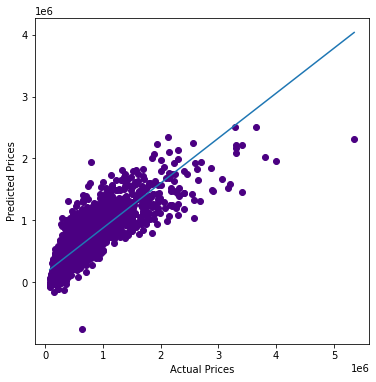

In [326]:
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(y_test,predictions, color="indigo")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predictions, 1))(np.unique(y_test)))
plt.show();

First approach: with poorly cleaned data and no preprocessing we managed an accuracy of only 65% and a mean absolute error of $139.643, we will try to improve the accuracy in next steps and also try different models

### Second Linear Regression with Normalizer

#### Normalizing

In [327]:
from sklearn.preprocessing import Normalizer
dfnorm = df.drop(columns=['price'])
transformer = Normalizer()
transformer.fit(dfnorm)
normalized = transformer.transform(dfnorm)

In [328]:
normalized

array([[3.05012099e-05, 1.01670700e-05, 1.01670700e-05, ...,
        1.36238738e-02, 5.74439453e-02, 6.10024198e-04],
       [3.04688415e-05, 2.28516311e-05, 2.03125610e-05, ...,
        1.71641140e-02, 7.75838266e-02, 6.50001951e-04],
       [2.03252663e-05, 1.01626332e-05, 1.01626332e-05, ...,
        2.76423622e-02, 8.19311485e-02, 8.33335919e-04],
       ...,
       [2.03717425e-05, 7.63940344e-06, 2.03717425e-05, ...,
        1.03895887e-02, 2.04430436e-02, 6.11152275e-05],
       [3.05939103e-05, 2.54949253e-05, 2.03959402e-05, ...,
        1.43791379e-02, 1.31247875e-02, 1.12177671e-04],
       [2.03740537e-05, 7.64027013e-06, 2.03740537e-05, ...,
        1.03907674e-02, 1.38237954e-02, 7.13091879e-05]])

In [329]:
dfnorm = pd.DataFrame(normalized)

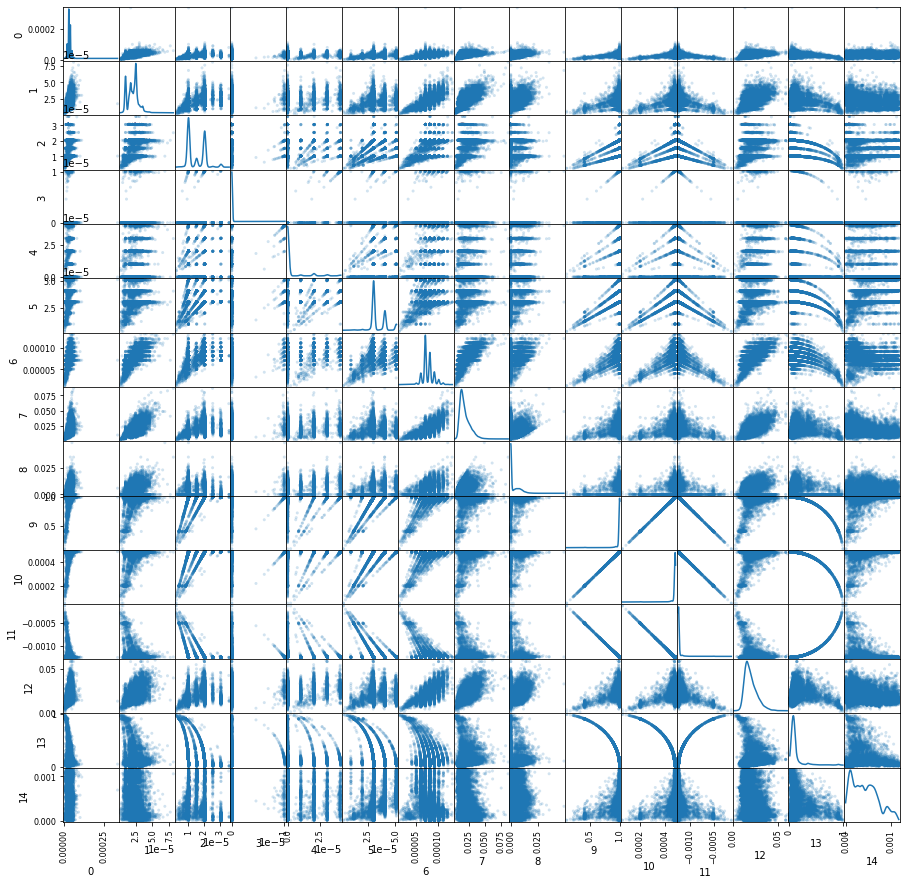

In [330]:
scatter_matrix(dfnorm, alpha=0.2, figsize=(15,15), diagonal="kde");

#### X & y

In [331]:
X = dfnorm

In [332]:
y = df['price']

#### Split data intro train and test


In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)

#### Second Linear Regression

In [334]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
import math

In [335]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions  = lm.predict(X_test)

In [336]:
R2 = r2_score(y_test,predictions)
R2

0.7015999713591101

In [337]:
MSE = mean_squared_error(y_test,predictions)
MSE

37574788783.62858

In [338]:
RMSE = sqrt(mean_squared_error(y_test, predictions))
RMSE

193842.17493525133

In [339]:
MAE = mean_absolute_error(y_test, predictions)
MAE

127223.42036106896

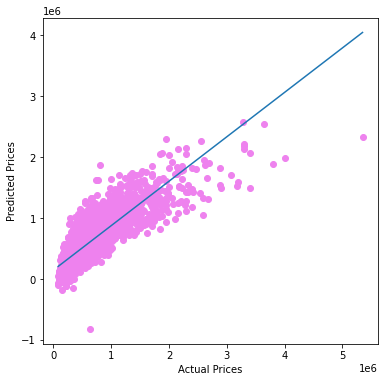

In [340]:
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(y_test,predictions, color="violet")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predictions, 1))(np.unique(y_test)))
plt.show();

We didn't get much of a difference using normalizer but we got a slight increase in the accuracy and mean absolute error so we will use it for our next tests.

### Third Linear Regression with MinMax Scaler

#### MinMaxing

In [341]:
from sklearn.preprocessing import MinMaxScaler
dfmin = df.drop(columns=['price'])
transformer = MinMaxScaler().fit(dfmin)
minmax = transformer.transform(dfmin)

In [342]:
minmax

array([[0.0625    , 0.06666667, 0.        , ..., 0.16193426, 0.00574235,
        0.52173913],
       [0.0625    , 0.23333333, 0.4       , ..., 0.22216486, 0.00802712,
        0.55652174],
       [0.03125   , 0.06666667, 0.        , ..., 0.3994149 , 0.00851302,
        0.71304348],
       ...,
       [0.03125   , 0.03333333, 0.4       , ..., 0.10686629, 0.00155764,
        0.05217391],
       [0.0625    , 0.26666667, 0.4       , ..., 0.17398038, 0.00073057,
        0.09565217],
       [0.03125   , 0.03333333, 0.4       , ..., 0.10686629, 0.00081098,
        0.06086957]])

In [343]:
dfmin = pd.DataFrame(minmax)

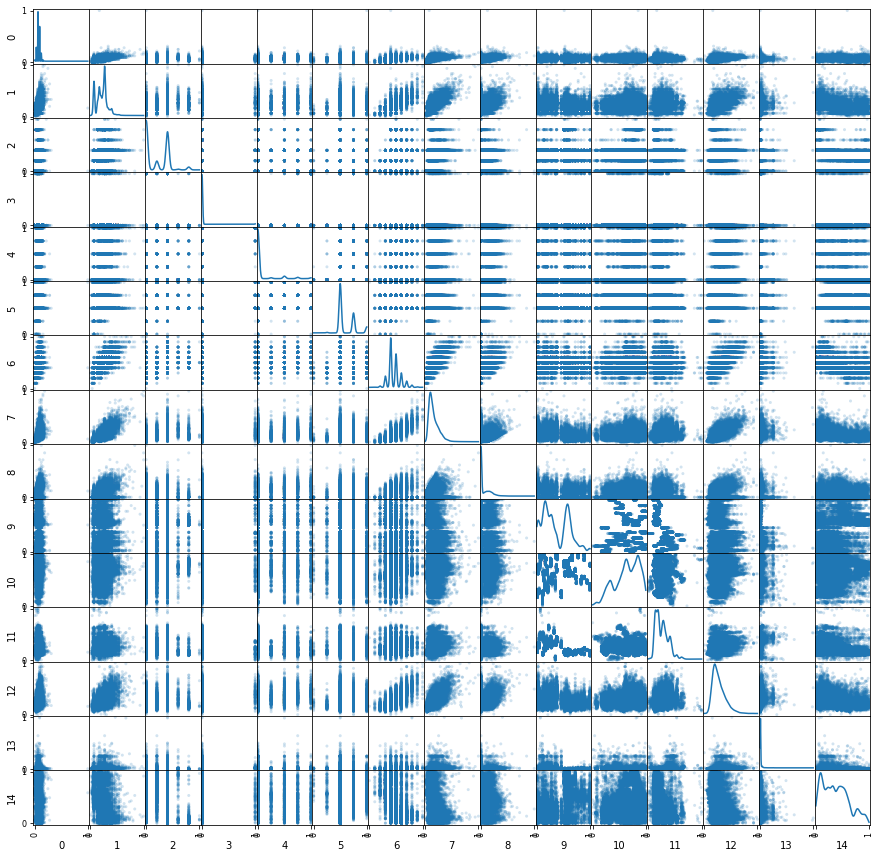

In [344]:
scatter_matrix(dfmin, alpha=0.2, figsize=(15,15), diagonal="kde");

#### X & y

In [345]:
X = dfmin

#### Data splitting

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)

#### Third linear regression with minmax scaler

In [347]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions  = lm.predict(X_test)

In [348]:
R2 = r2_score(y_test,predictions)
R2

0.6981818074472271

In [349]:
MSE = mean_squared_error(y_test,predictions)
MSE

38005206929.370094

In [350]:
RMSE = sqrt(mean_squared_error(y_test, predictions))
RMSE

194949.24193073975

In [351]:
MAE = mean_absolute_error(y_test, predictions)
MAE

127487.77663280208

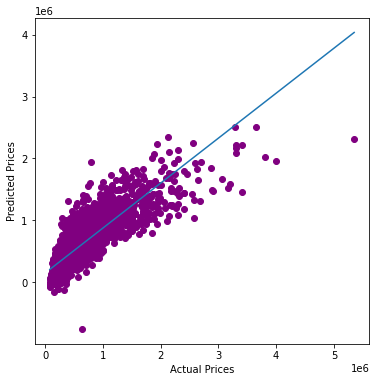

In [352]:
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(y_test,predictions, color="purple")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predictions, 1))(np.unique(y_test)))
plt.show();

## Simon tests

### KNN

In [364]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import MinMaxScaler # for feature scaling
from sklearn.preprocessing import OrdinalEncoder # to encode categorical variables
from sklearn.neighbors import KNeighborsClassifier # for KNN classification
from sklearn.neighbors import KNeighborsRegressor # for KNN regression

import matplotlib.pyplot as plt # for data visualization
import plotly.express as px # for data visualization

In [354]:
df2=df
df2

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_age
0,3,1.00,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,221900,60
1,3,2.25,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,538000,64
2,2,1.00,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,180000,82
3,4,3.00,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,604000,50
4,3,2.00,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,510000,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0,0,3,8,1530,0,98103,47.6993,-122.346,1530,1509,360000,6
21593,4,2.50,2.0,0,0,3,8,2310,0,98146,47.5107,-122.362,1830,7200,400000,1
21594,2,0.75,2.0,0,0,3,7,1020,0,98144,47.5944,-122.299,1020,2007,402101,6
21595,3,2.50,2.0,0,0,3,8,1600,0,98027,47.5345,-122.069,1410,1287,400000,11


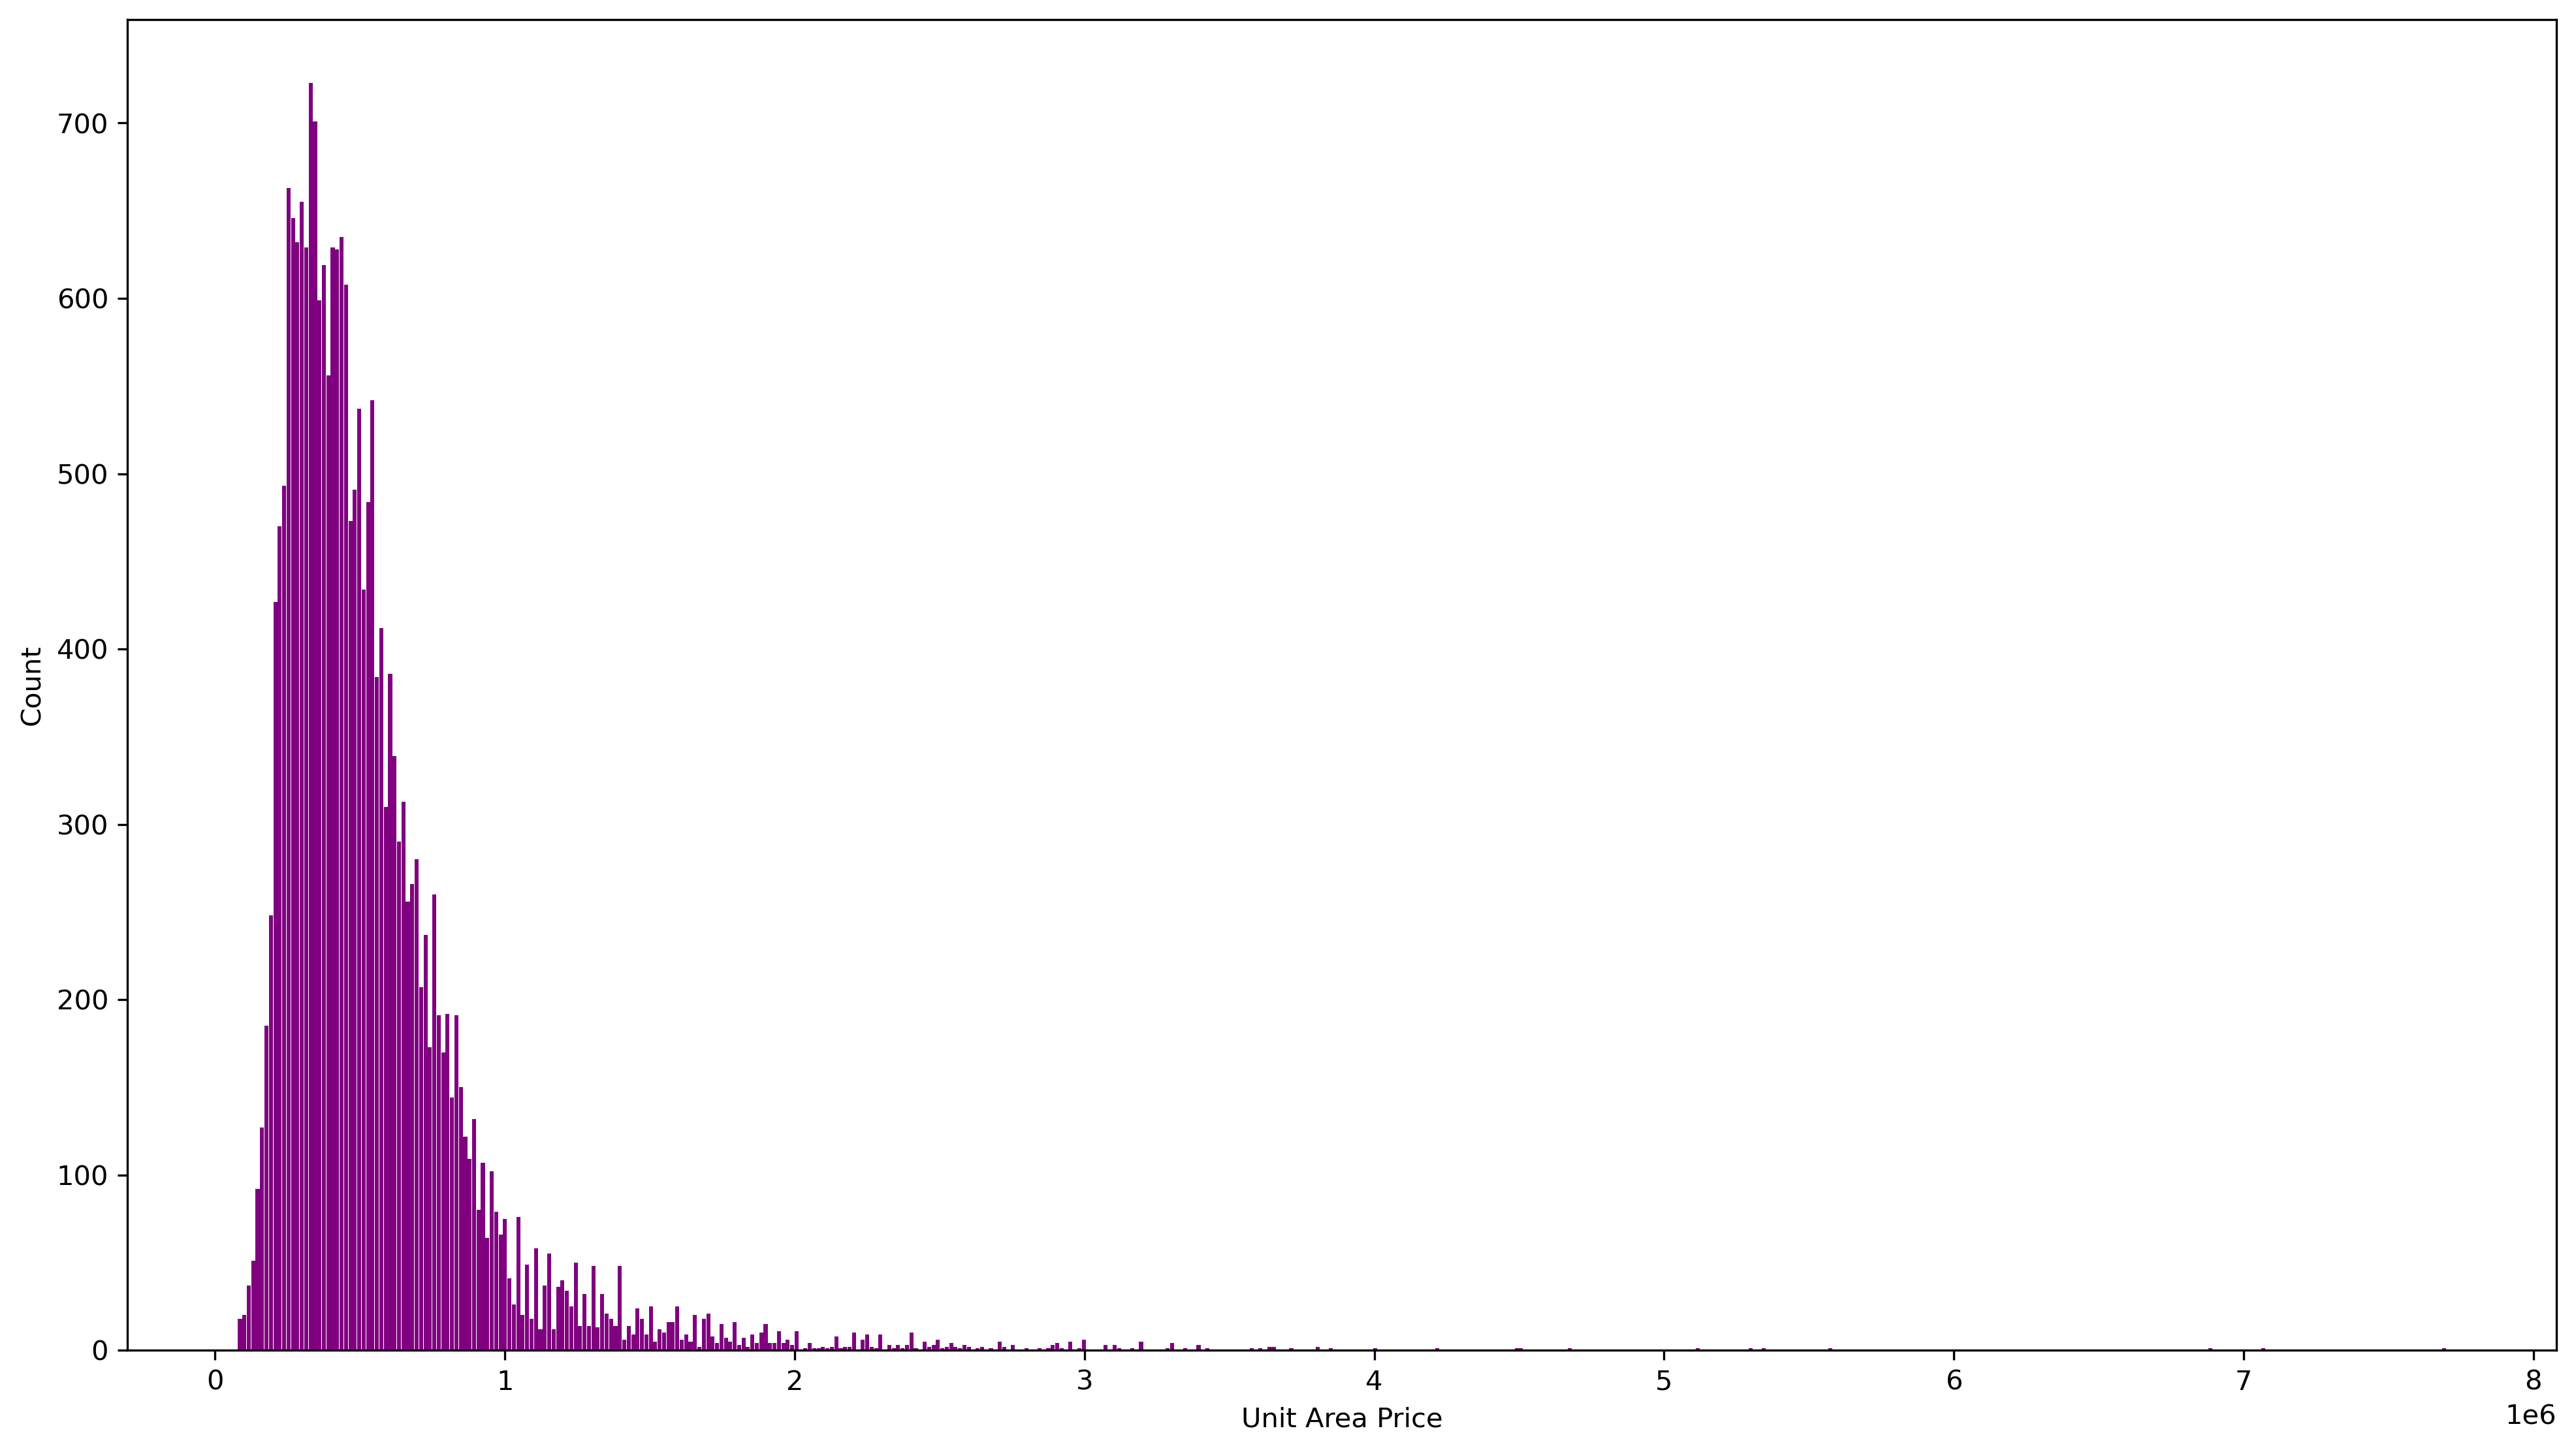

In [355]:
# Plot price of unit distribution chart
plt.figure(figsize=(16,9), dpi=300)
plt.xlabel('Unit Area Price')
plt.ylabel('Count')
plt.hist(df2['price'], bins=500, color='purple', rwidth=0.9)
plt.show()

In [275]:
# Bin unit price into 33% quantiles
df2['price_band'] = pd.qcut(df2['price'], 3, labels=['bottom 33', 'middle 33', 'top 33'])
df2

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_age,price Band,price_band
0,3,1.00,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,221900,60,bottom 33,bottom 33
1,3,2.25,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,538000,64,middle 33,middle 33
2,2,1.00,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,180000,82,bottom 33,bottom 33
3,4,3.00,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,604000,50,top 33,top 33
4,3,2.00,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,510000,28,middle 33,middle 33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0,0,3,8,1530,0,98103,47.6993,-122.346,1530,1509,360000,6,bottom 33,bottom 33
21593,4,2.50,2.0,0,0,3,8,2310,0,98146,47.5107,-122.362,1830,7200,400000,1,middle 33,middle 33
21594,2,0.75,2.0,0,0,3,7,1020,0,98144,47.5944,-122.299,1020,2007,402101,6,middle 33,middle 33
21595,3,2.50,2.0,0,0,3,8,1600,0,98027,47.5345,-122.069,1410,1287,400000,11,middle 33,middle 33


In [373]:
print(df2.keys())

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'house_age', 'X5 latitude scl',
       'X6 longitude scl', 'X2 house age scl'],
      dtype='object')


In [518]:
df3 = df2[['sqft_above']]
df3

,sqft_above
0,1180
1,2170
2,770
3,1050
4,1680
...,...
21592,1530
21593,2310
21594,1020
21595,1600


In [543]:
X_train, X_test, y_train, y_test = train_test_split(df3, df2.price, test_size=0.33, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [19, 21597]

In [520]:
import matplotlib.pyplot as pyplot
import seaborn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [522]:
print("Training r2 for 11 neigbors: {:9f}".format(train_score[9]))
print("Testing r2 for 11 neighbors: {:9f}".format(test_score[9]))


Training r2 for 11 neigbors:  0.392060
Testing r2 for 11 neighbors:  0.353873


### Logistic Regression??

In [78]:
#lr = LogisticRegression(max_iter = 400)

In [79]:
#lr.fit(X_train, y_train)

In [80]:
#y_pred = lr.predict(X_test)
#accuracy_score(y_test, y_pred)